In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

<h1> Data Ingestion </h1>

Downloading the Data from UCI

In [40]:
!curl -s -o diabetes.zip "https://archive.ics.uci.edu/static/public/296/diabetes+130-us+hospitals+for+years+1999-2008.zip"

Extract the required file from the zip folder

In [41]:
with zipfile.ZipFile("diabetes.zip", 'r') as zip_ref:
    zip_ref.extractall()

<h1> Data Exploration </h1>

In [3]:
raw_data = pd.read_csv("diabetic_data.csv")

In [4]:
raw_data.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [14]:
print(
    f"Dimensions of the data: {raw_data.shape[0]} rows and {raw_data.shape[1]} columns")

Dimensions of the data: 101766 rows and 50 columns


It is observed that a few of the columns have the value "?". We need to replace them with na and then check for null values

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

From the above, we observe that:
1. There are no missing values since they are encoded as "?" as stated above
2. The data types are either object or int64

In [48]:
raw_data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


<h1> Data Cleaning and Preprocessing </h1>

In [5]:
# Replacing the "?" with na's
raw_data.replace("?", np.NaN, inplace=True)

Checking for nulls again

In [8]:
raw_data.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

As we can see a few of the features like race, weight, payer_code, medical_speciality, diag_1, diag_2 and diag_3 have nulls 

We can remove weight and payer_code since they aren't relevant to the outcome and they have too many nulls|

In [20]:
raw_data.drop(['weight', 'payer_code'], axis=1, inplace=True)

In [24]:
raw_data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

<h1> Feature Engineering </h1>

C:\Users\tgt55\AppData\Local\Temp\ipykernel_11368\3150408232.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_data.corr(), annot=True, cmap='coolwarm')


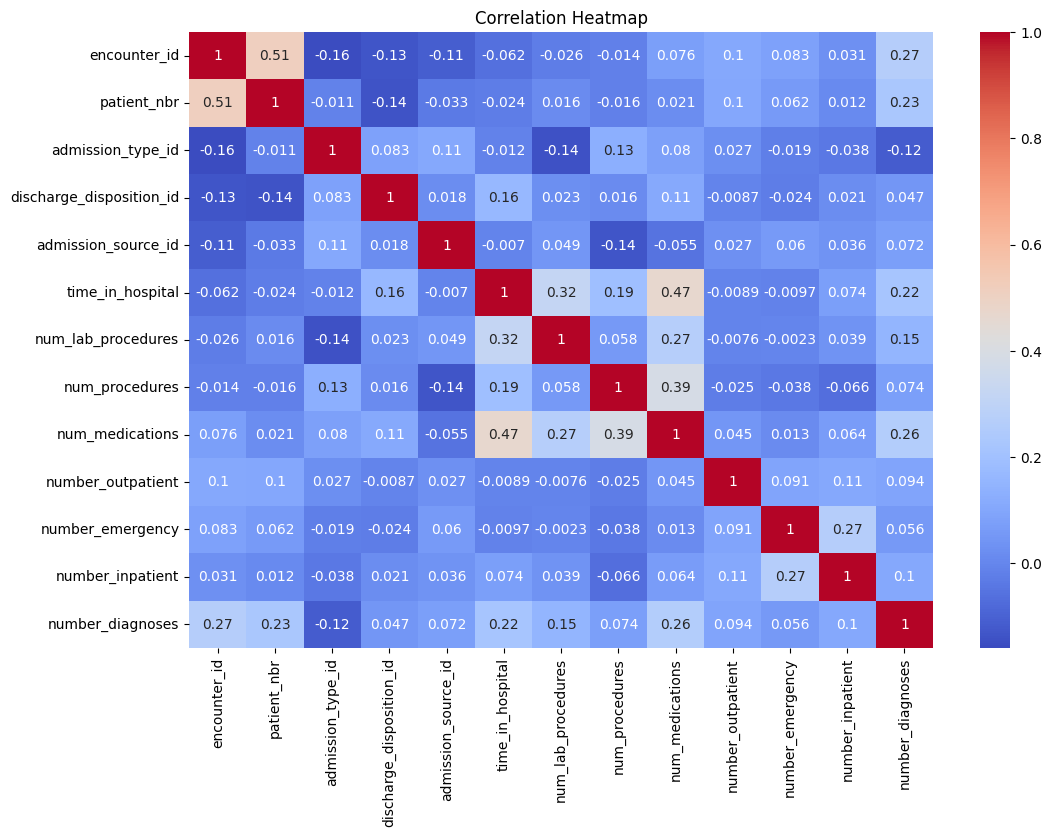

In [22]:
# Create the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(raw_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show();

<h1> Analytical Question </h1>

<h2> a. Questions solved using functions you define (such as lambda-map functions): </h2>

<h2> b. Questions utilizing Pandas and NumPy</h2>

<h3> 6. Find the median length of stay for diabetic patients. </h3>

In [39]:
print(
    f"The median length of stay for diabetic patients are {np.median(raw_data['time_in_hospital'])} days")

The median length of stay for diabetic patients are 4.0 days


<h3> 7. Calculate the percentage of male and female patients in the dataset. </h3>

In [34]:
gender_counts = raw_data['gender'].value_counts()

In [35]:
total_patients = len(raw_data)

In [40]:
male_patients = (gender_counts['Male'] / total_patients) * 100

In [38]:
female_patients = (gender_counts['Female'] / total_patients) * 100

In [44]:
print(f"The percentage of Male patients: {male_patients: .2f} %")
print(f"The percentage of Female patients: {female_patients: .2f} %")

The percentage of Male patients:  46.24 %
The percentage of Female patients:  53.76 %


<h3> 8. Determine the most common race/ethnicity among diabetic patients </h3>

In [82]:
print(f"The most common race/enthnicity among diabetic patients is {raw_data['race'].value_counts().idxmax()} with \
the number of patients being : {raw_data['race'].value_counts()[0]}")

The most common race/enthnicity among diabetic patients is Caucasian with the number of patients being : 76099


<h3> 9. Create a new column that categorizes patients based on the number of medications they are taking.</h3>
For example, create categories like 'Low', 'Medium', and 'High' based on the 'num_medications' column.

In [97]:
min_meds = raw_data['num_medications'].min()
print("The minimum number of medications a patient has:",min_meds)

The minimum number of medications a patient has: 1


In [98]:
max_meds = raw_data['num_medications'].max()
print("The maximum number of medications a patient has:", max_meds)

The maximum number of medications a patient has: 81


In [99]:
print(f"The range of number of medications a patient could have is between {min_meds} and {max_meds}")

The range of number of medications a patient could have is between 1 and 81


In [114]:
num_bins = 3
# Calculate bin width
bin_width = (max_meds - min_meds) // 3

# Create the bins based on the minimum, maximum, and width of each bin
bins = [min_meds-1 + i * bin_width for i in range(num_bins)]
bins.append(max_meds)

In [115]:
bins

[0, 26, 52, 81]

In [123]:
# Create the column and assign the labels to the bins
raw_data['medication_category'] =  pd.cut(x = raw_data['num_medications'], bins = bins, labels= ['low', 'medium', 'high'])

In [124]:
raw_data[['num_medications', 'medication_category']]

,num_medications,medication_category
0,1,low
1,18,low
2,13,low
3,16,low
4,8,low
...,...,...
101761,16,low
101762,18,low
101763,9,low
101764,21,low


<h3> 10. Find the average number of lab procedures for patients who underwent surgery and those who didn't</h3>

In [148]:
# Patients who had surgeries done
patients_with_surgeries = raw_data[raw_data['num_procedures'] > 0]

In [149]:
# Patients who didn't get any surgeries
patients_without_surgeries = raw_data[raw_data['num_procedures'] == 0]

In [150]:
print(f"The average number of lab procedures for patients who underwent surgery is \
{patients_with_surgeries['num_lab_procedures'].mean():.2f}")

The average number of lab procedures for patients who underwent surgery is 43.24


In [151]:
print(f"The average number of lab procedures for patients who didn't have surgery is \
{patients_without_surgeries['num_lab_procedures'].mean():.2f}")

The average number of lab procedures for patients who didn't have surgery is 42.93
